# Installs

In [24]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------- ------------------------------- 61.4/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 4.6 MB/s eta 0:00:00


# Imports

In [73]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
# df['target'] = wine_data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [54]:
print(df.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [55]:
print(df.duplicated().sum())

0


In [79]:
def plot_all_in_one(dataFrame):
    for col in dataFrame.columns:
        sns.lineplot(data=dataFrame, x=dataFrame.index, y=col, label=col)
    plt.title("All Data In One Plot")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.show()
    
def plot_separate(dataFrame):
    for col in dataFrame.columns:
        plt.figure(figsize=(10,6))
        sns.lineplot(data=dataFrame, x=dataFrame.index, y=col)
        plt.title(f"{col}")
        plt.xlabel("Index")
        plt.ylabel("Value")
        plt.show()
    

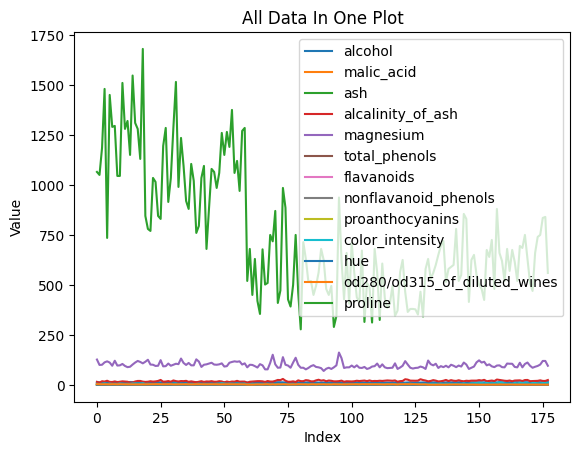

In [80]:
plot_all_in_one(df)

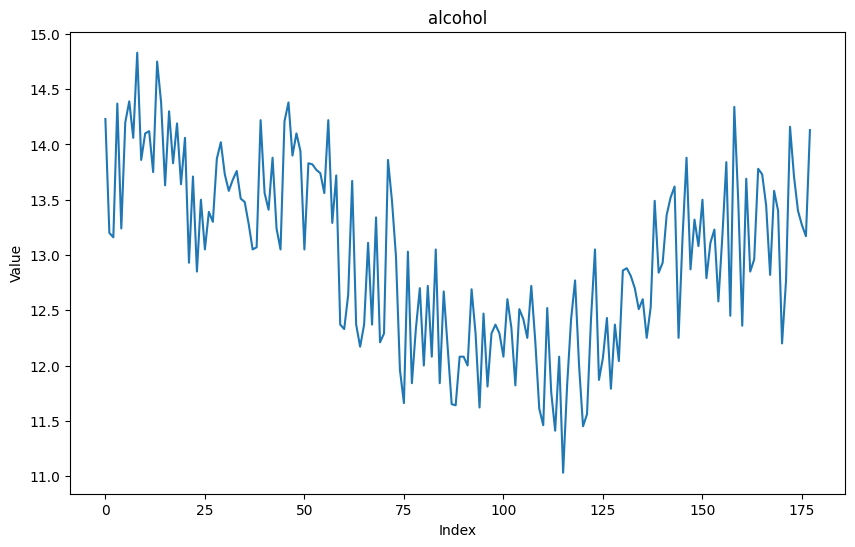

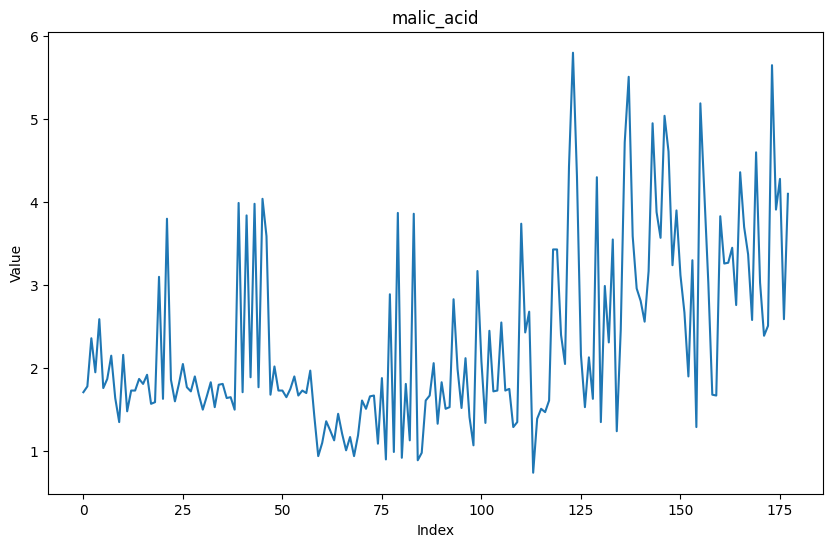

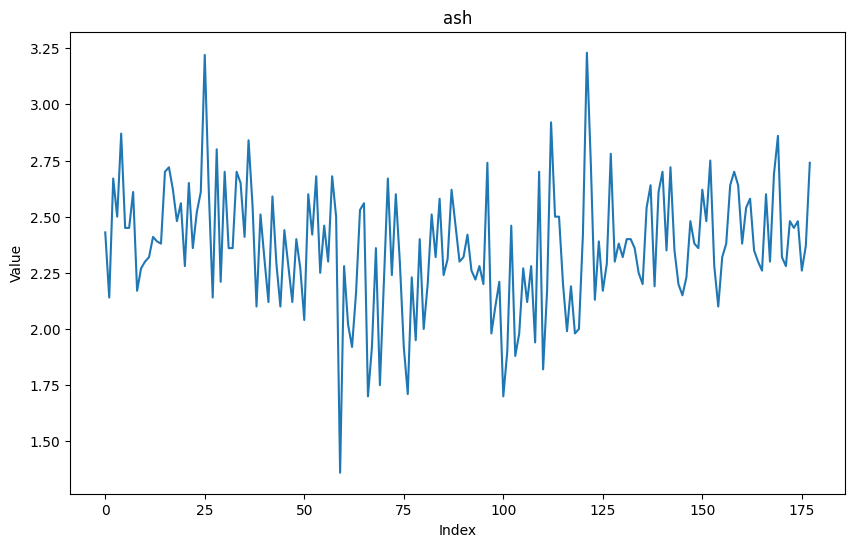

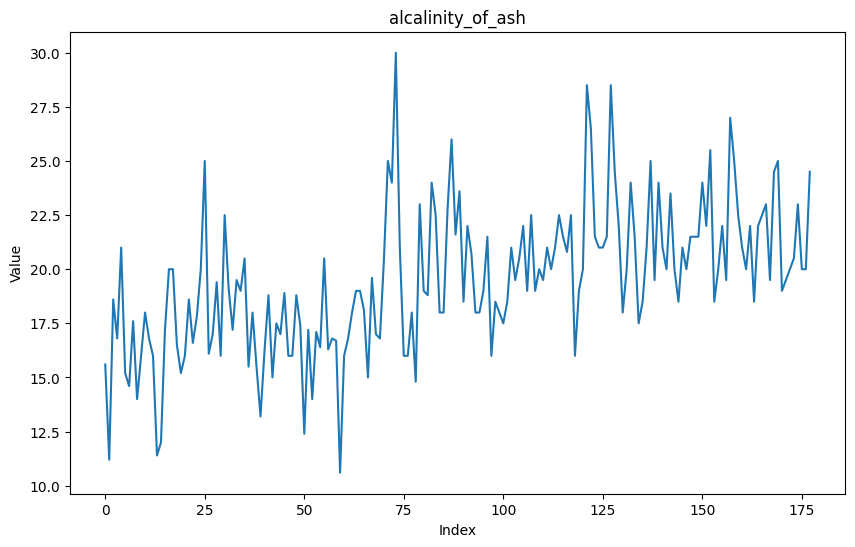

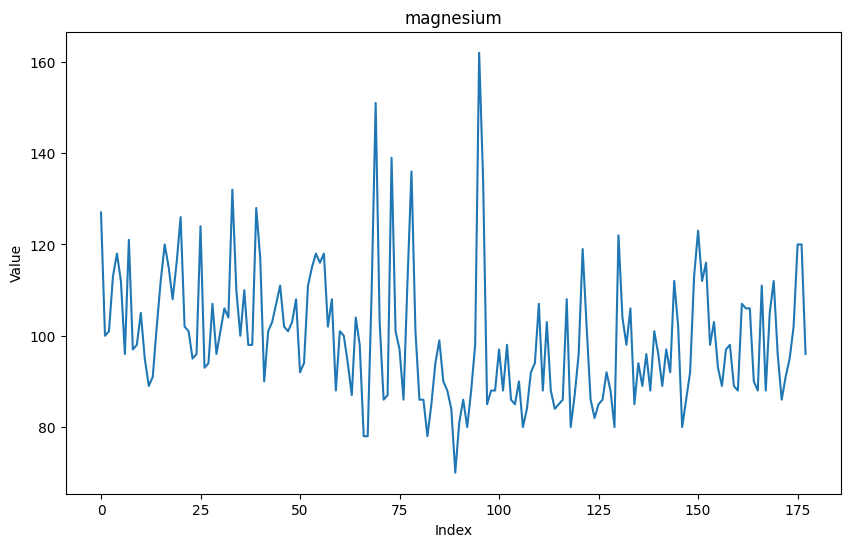

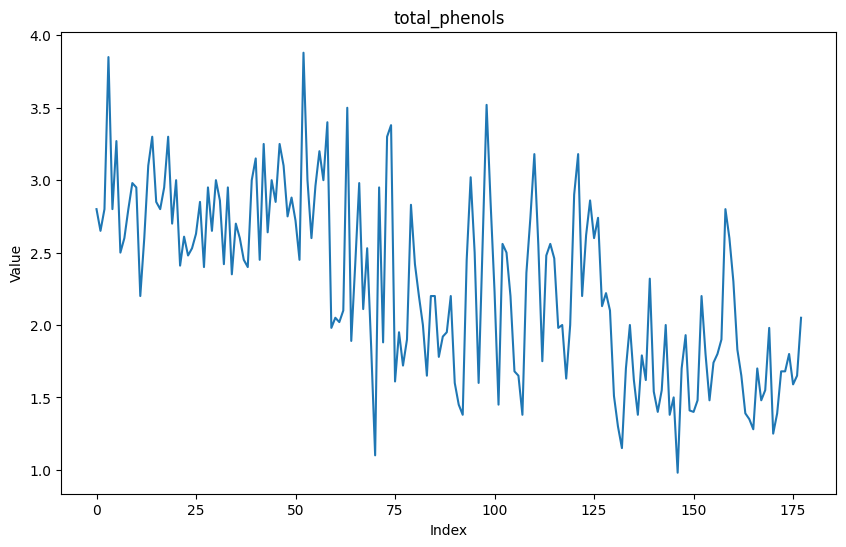

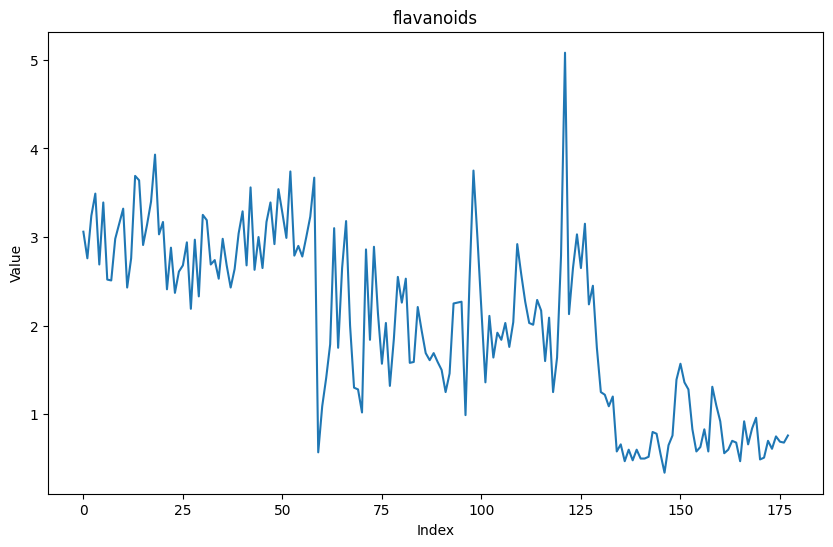

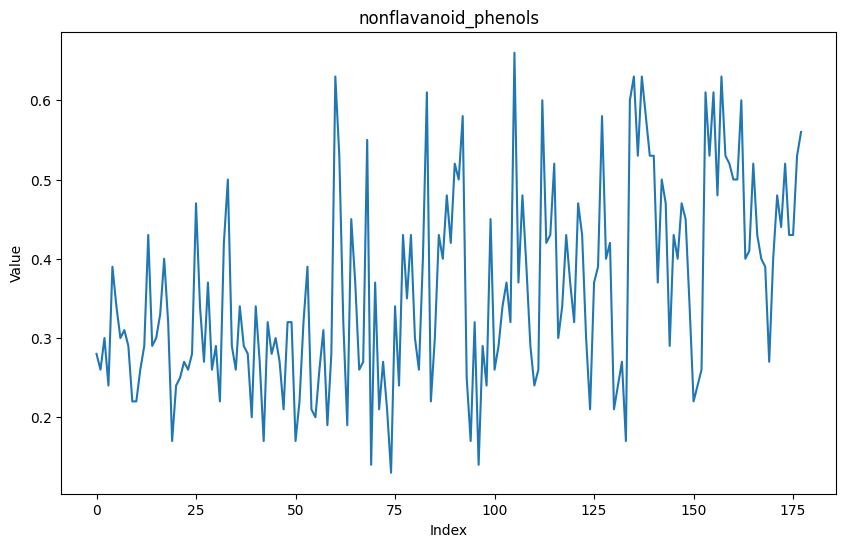

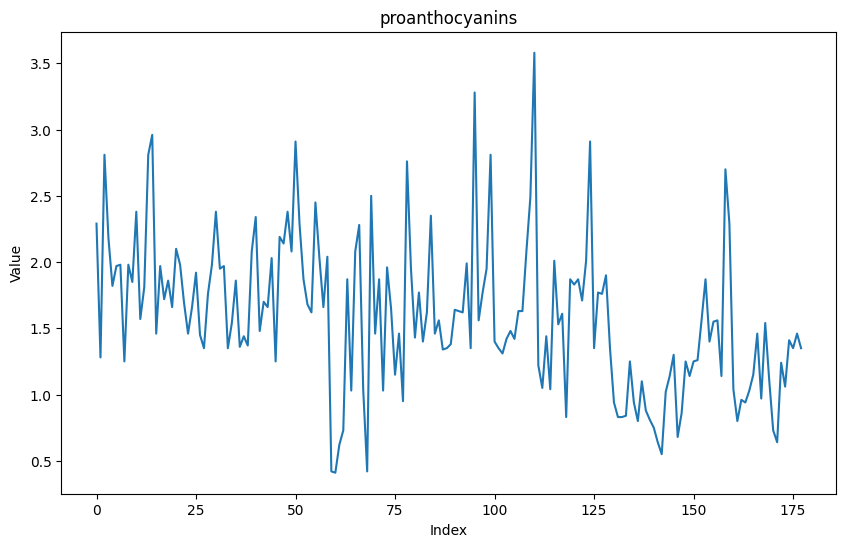

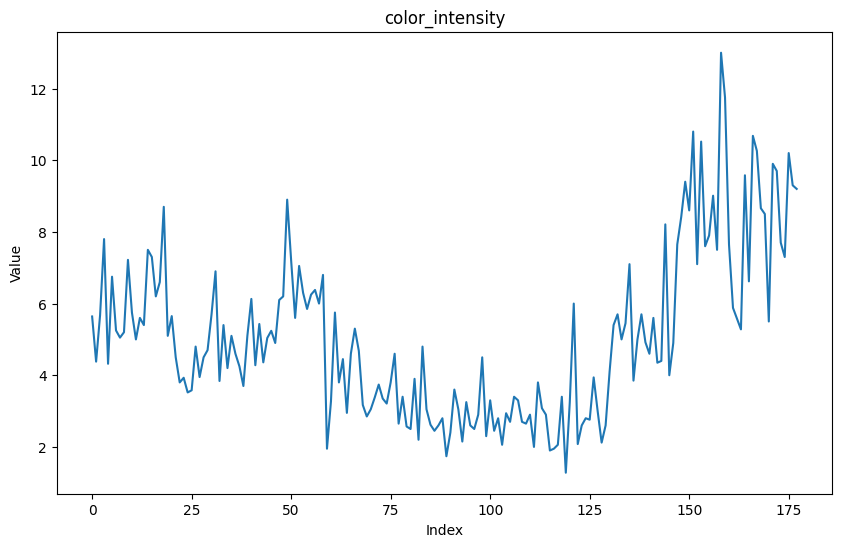

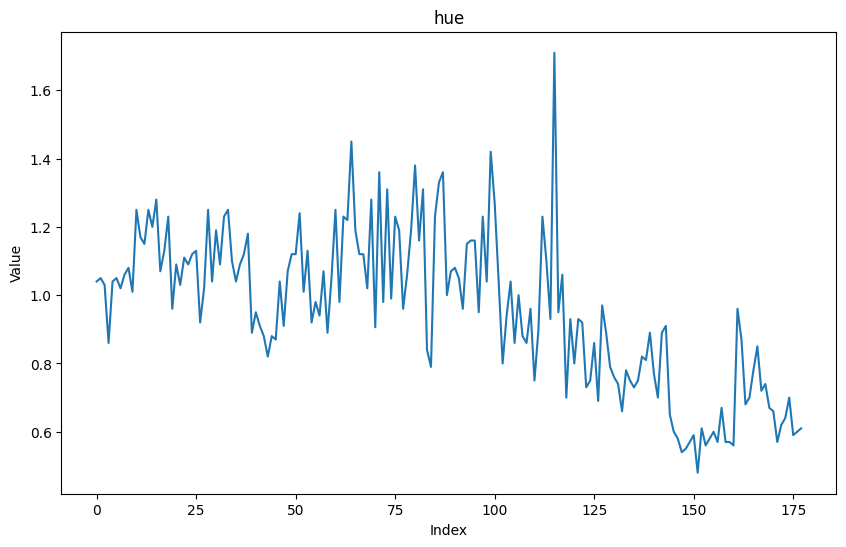

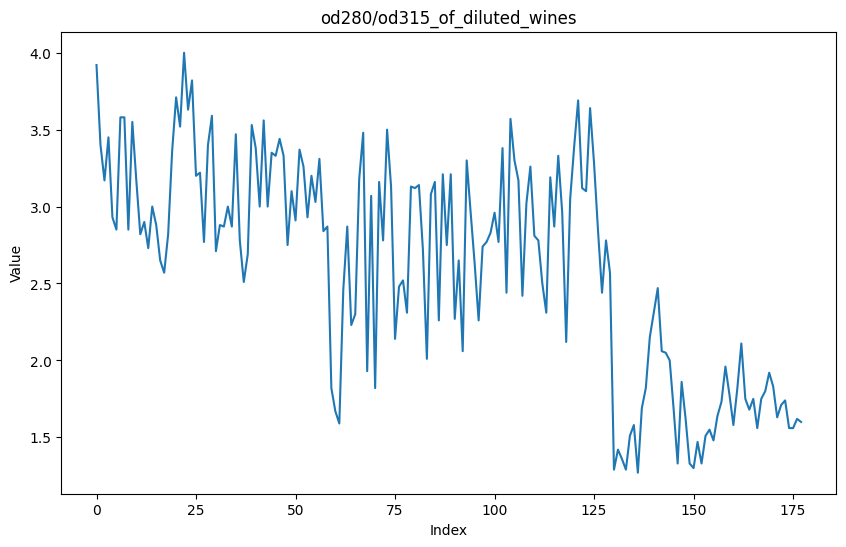

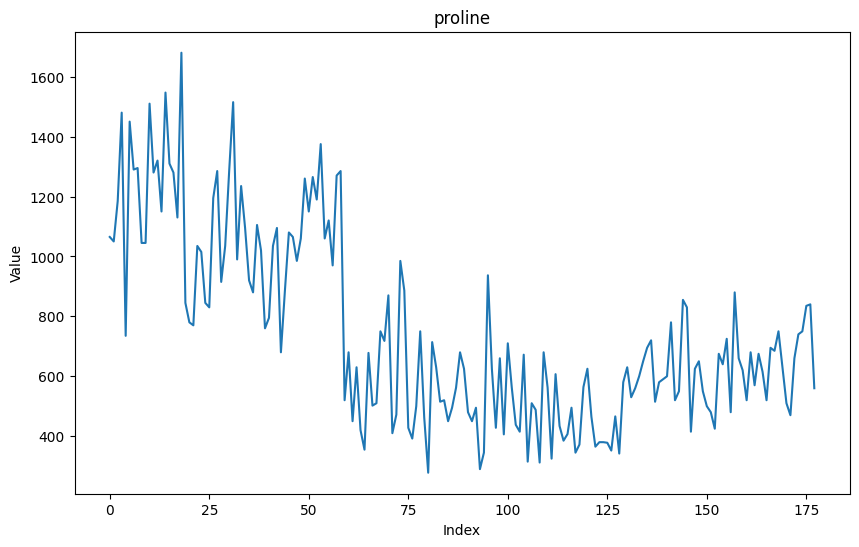

In [81]:
plot_separate(df)

In [82]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

df_clean = df.copy()
for column in df_clean.columns:
    if df_clean[column].dtype in [float, int]:  # Columns with numerical values
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

# Look at the shape of the new dataframe
print(df_clean.shape)  # New shape


(178, 13)
(161, 13)


In [85]:
scaler = StandardScaler()
df_clean_standardized = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

print(df_clean_standardized.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.515163   -0.579166  0.270936          -1.248144   2.298023   
1  0.209648   -0.512507 -0.931537          -2.732175   0.114047   
2  0.158948    0.039806  1.266087          -0.236305   0.194935   
3  1.692612   -0.350622  0.561189          -0.843409   1.165591   
4  0.260347    0.258826  2.095379           0.573166   1.570031   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.828643    1.055948             -0.650569         1.466583   
1       0.589411    0.749315             -0.815257        -0.505150   
2       0.828643    1.239928             -0.485881         2.481732   
3       2.503264    1.495455             -0.979945         1.251840   
4       0.828643    0.677767              0.255215         0.549044   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.282097  0.383333                      1.828097  0.982174  
1        -0.304357  0.429479

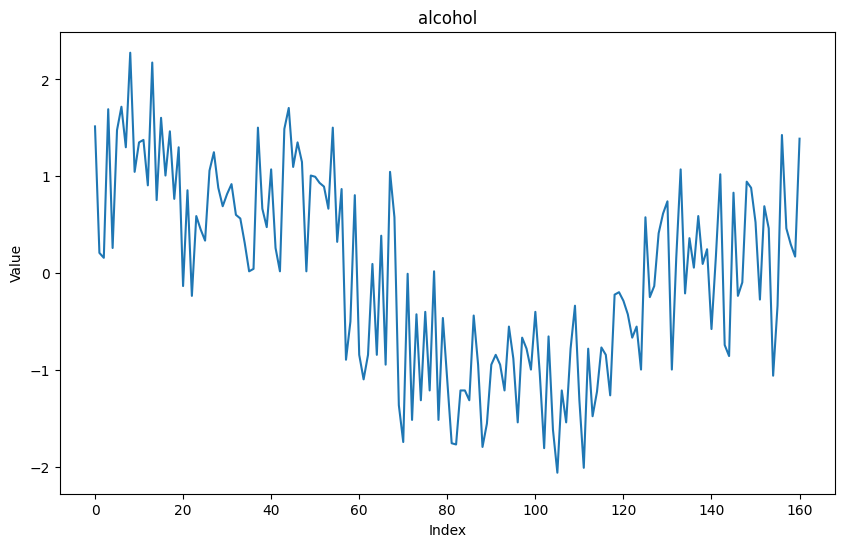

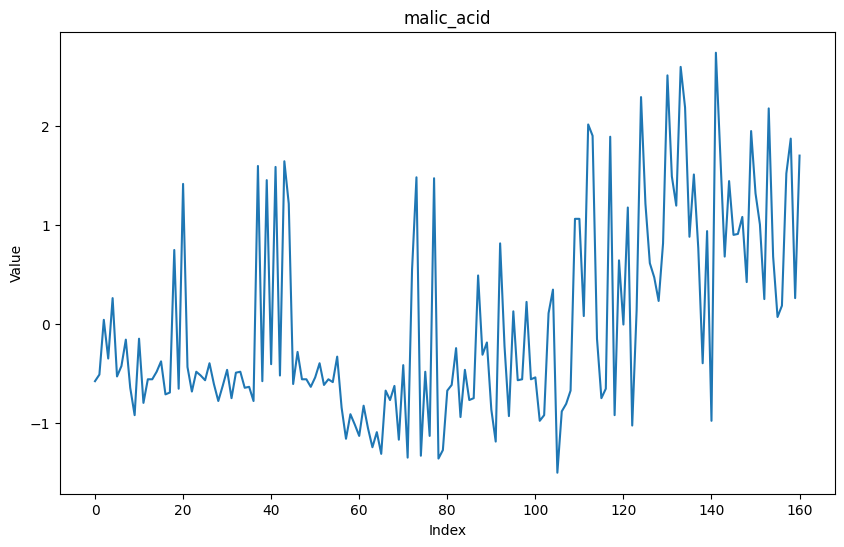

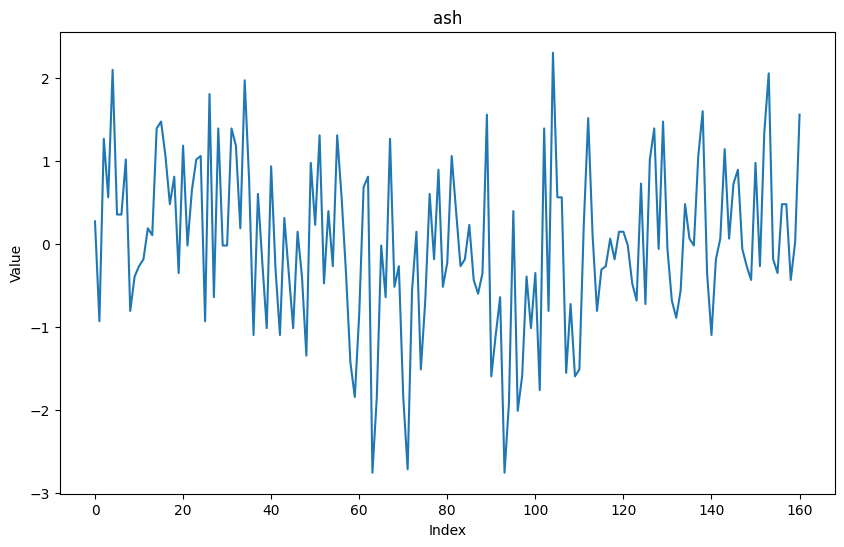

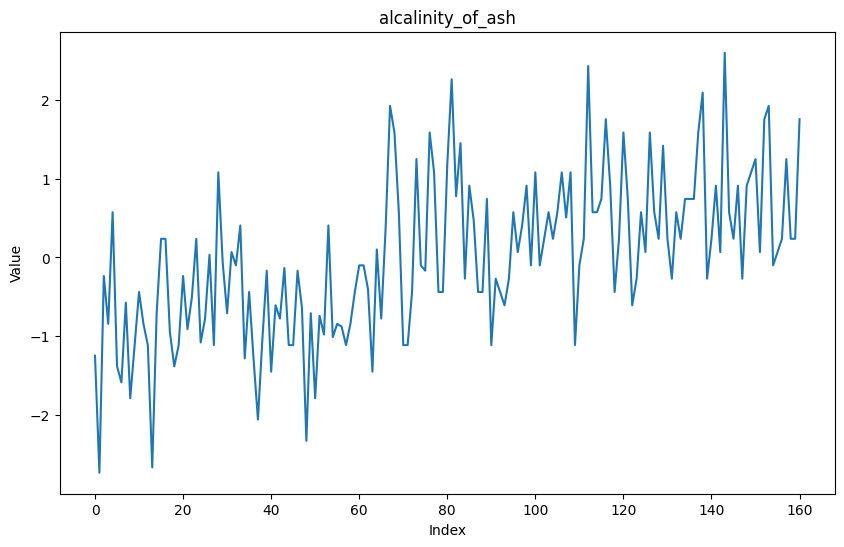

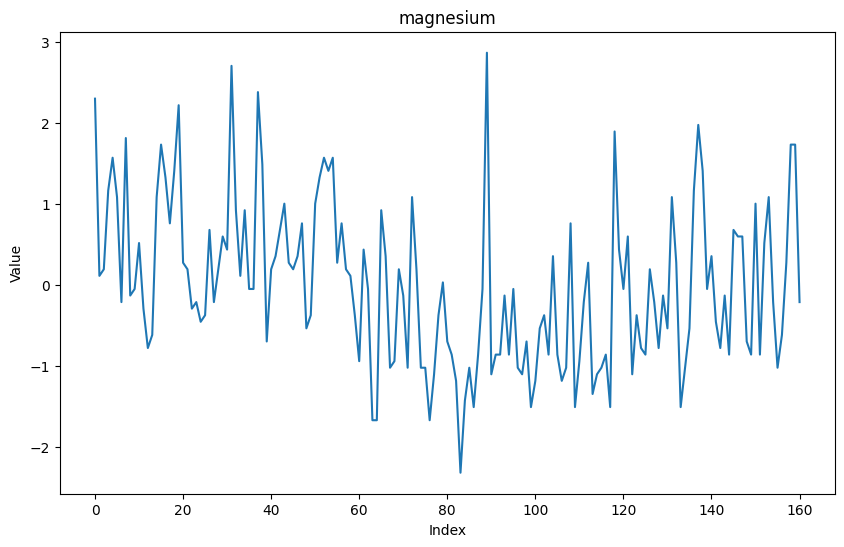

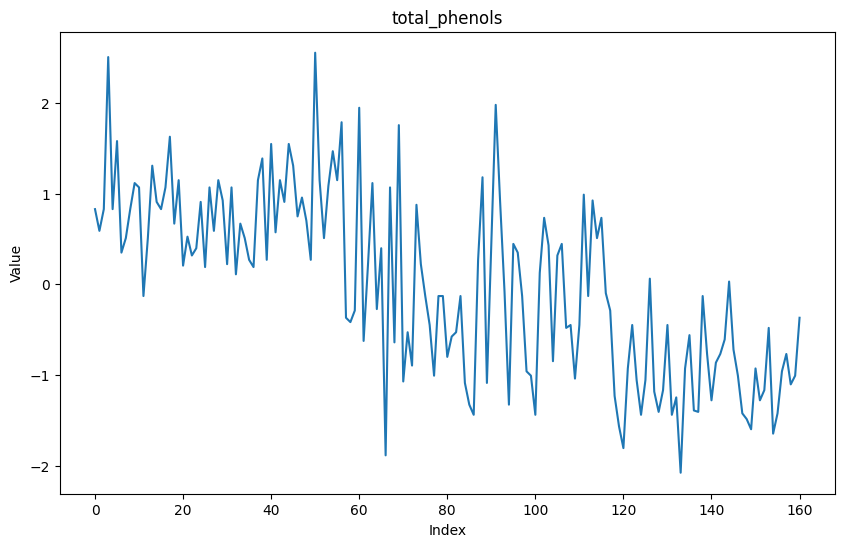

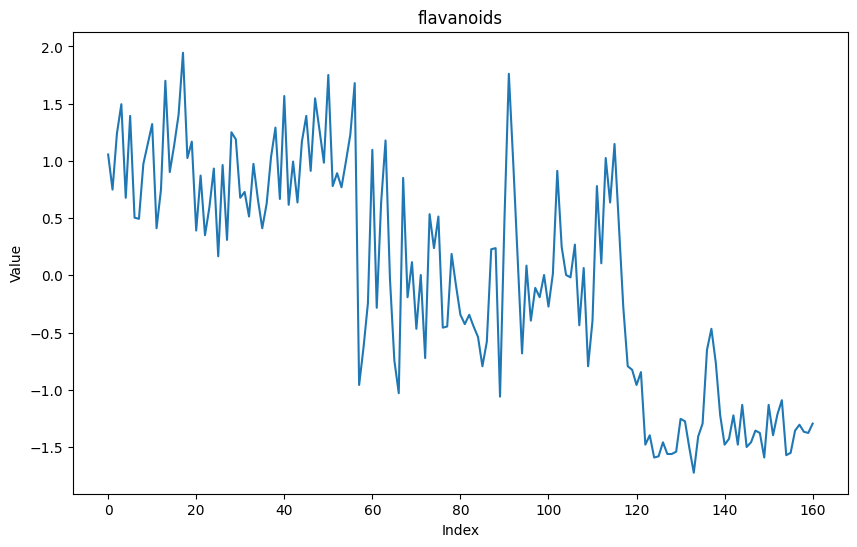

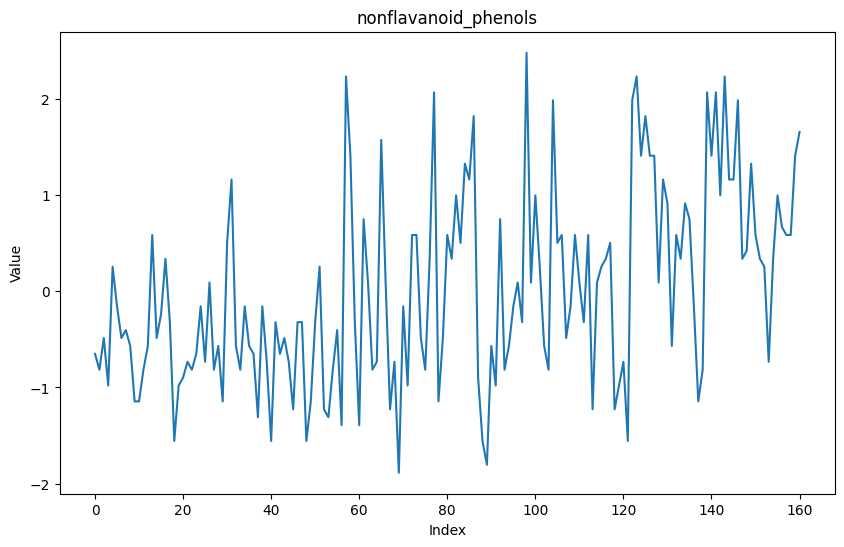

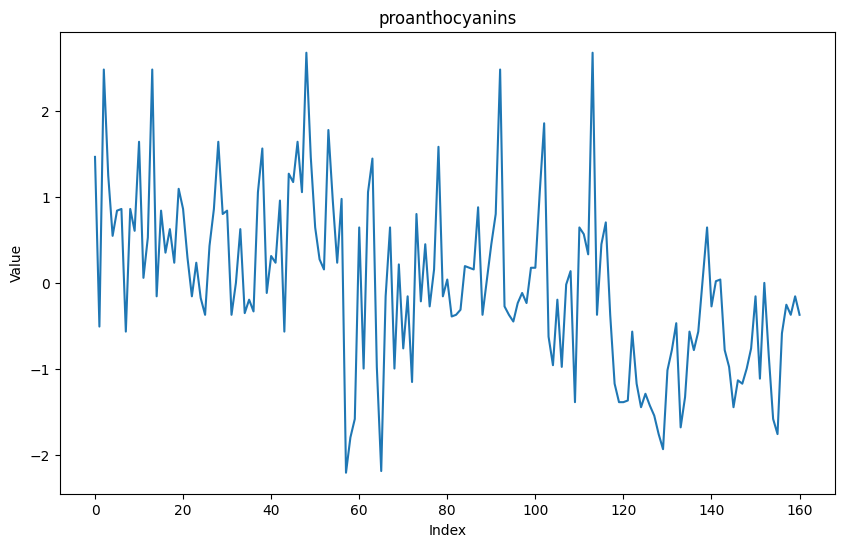

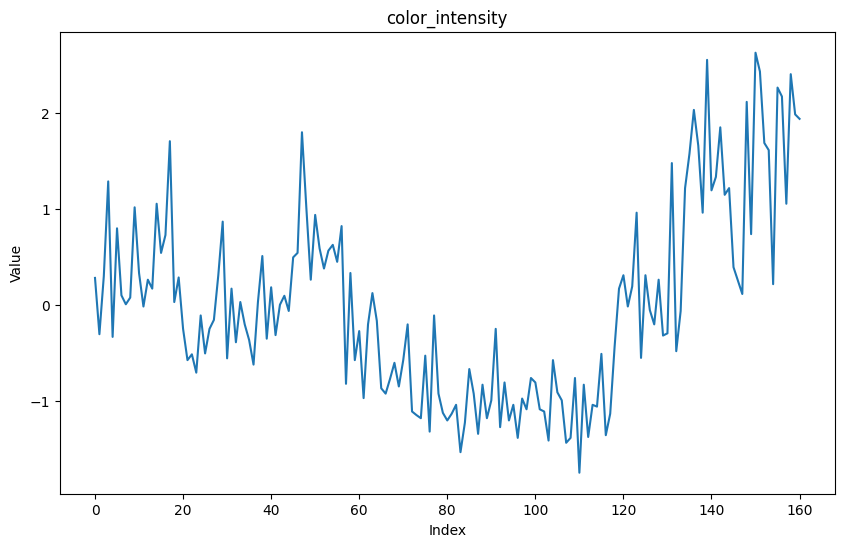

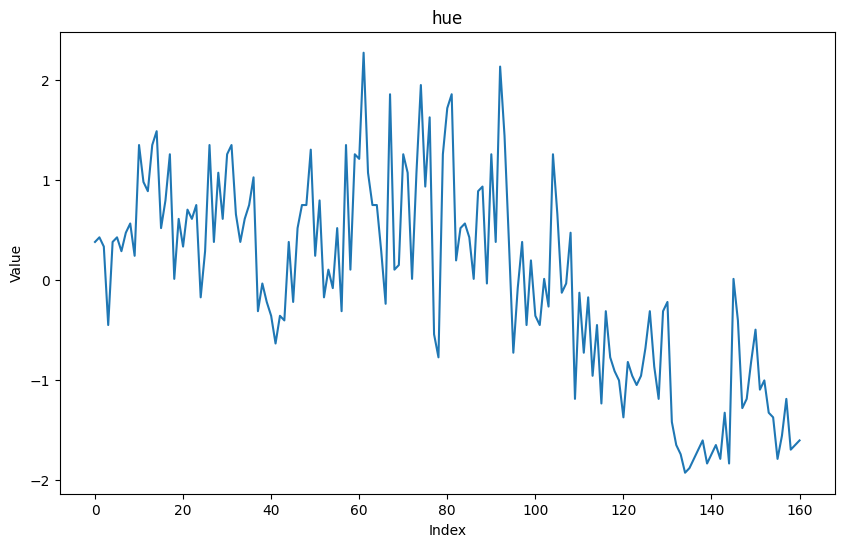

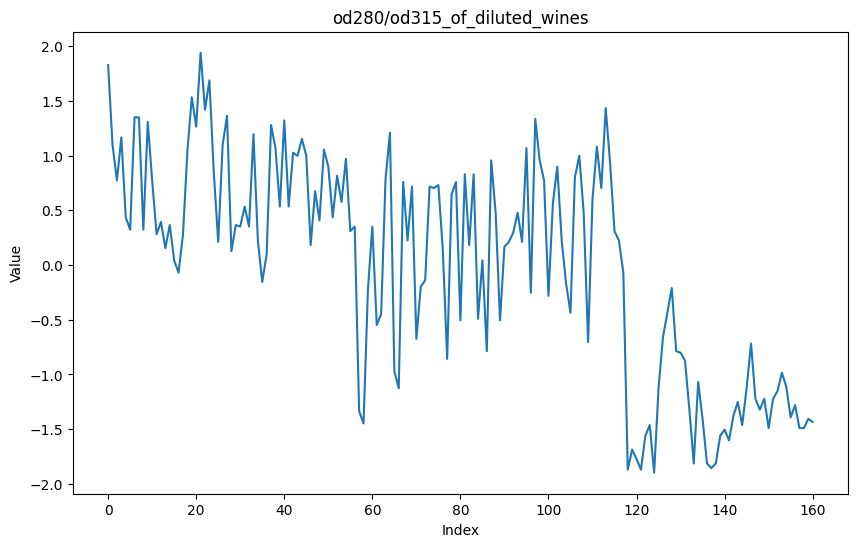

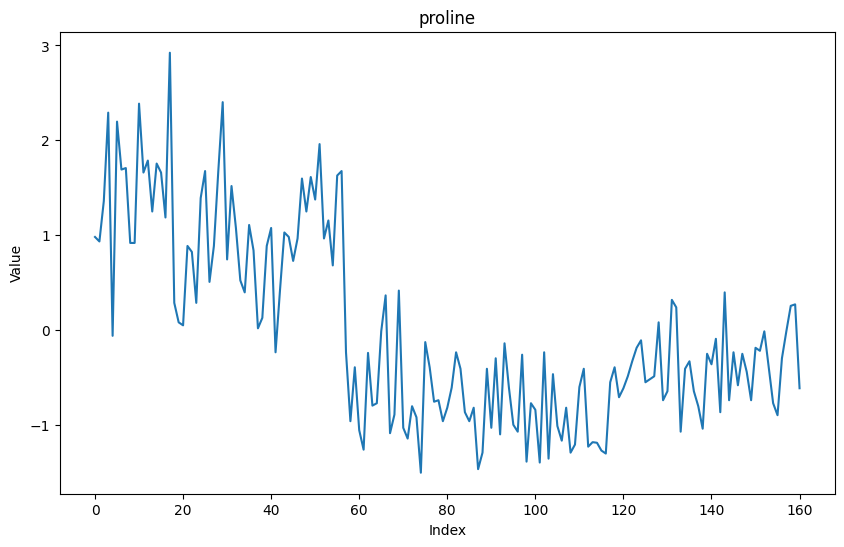

In [86]:
plot_separate(df_clean_standardized)